In [1]:
"""MgH+ Polaritonic Potential Energy Surfaces"""

__authors__ = ["Jonathan J. Foley"]
__email__   = ["foleyj10@wpunj.edu"]
__credits__ = ["Jonathan J. Foley"]
__copyright__ = "(c) 2008-2020, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-02-11"

## Polaritonic surfaces of MgH+



In [40]:
import psi4
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from numpy import linalg as LA

from psi4.driver.procrouting.response.scf_response import tdscf_excitations

In [41]:
# run across an H2O symmetric bond stretching surface
# 0.5 - 2.0 Angstroms, increments of 0.05, total of 31 geometries
# use H-H bond angle 104.5 degrees
# save geometry, nuclear charges (same across the surface), and scf energy as lists

### THIS DOES NOT PROPERLY SAVE THE PES OF THE FIRST 8 STATES ACROSS 30 GEOMETRIES AT
### THIS TIME!  I THINK THERE IS AN ISSUE WITH APPENDING THE POLES DATA TO THE ES ARRAY 
### AT THIS TIME
# set basis
psi4.set_options({
    'basis':'cc-pVDZ'
})

n_states = 4
n_geoms = 25
# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Es = np.zeros((n_states+1, n_geoms))

# initialize z-component of transition dipole list
mu_z = np.zeros((n_states, n_geoms))
# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })

    

    
    # calculate and save the energy
    #Es.append(psi4.energy('scf'))
    e, wfn = psi4.energy("b3lyp/cc-pVDZ", return_wfn=True, molecule=mol)
    
    res = tdscf_excitations(wfn, states=4, triplets = "NONE")
    
    # get poles and residues to plot OPA and ECD spectra
    poles = [r["EXCITATION ENERGY"] for r in res]
    mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Es[0,ctr] = e
    
    for j in range(0, n_states):
        Es[j+1,ctr] = e + poles[j]
        mu_z[j,ctr] = mu[j][2]
    print(i, Es[:,ctr])
    ctr += 1
    
#e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=h2o2)
#res = tdscf_excitations(wfn, states=10)

right vecs
[[ 6.27545674e-05  8.17831470e-18 -3.53733476e-17 -2.99875246e-06
   3.22774080e-05  6.65275199e-18 -3.20849254e-17 -3.69911334e-05
   1.76781017e-18  3.91277553e-19  5.10837626e-19 -8.78900014e-19
  -3.11003675e-05 -8.32239737e-06  1.15952683e-17 -1.38679758e-18
   5.88371610e-05]
 [ 2.21738497e-03  4.58626526e-18 -1.30765713e-16  6.75295200e-04
   1.41775735e-03  2.75400788e-17 -2.08820845e-16 -2.65078596e-04
   4.31806880e-17  2.07467297e-17  9.80477932e-18 -5.90685250e-18
  -2.25342160e-03 -2.13904198e-04  1.30132417e-16  4.76990234e-17
   2.46950705e-03]
 [ 4.22103886e-03 -3.87013289e-16  5.19960240e-16  8.93902101e-03
   9.87803116e-04 -5.55476720e-16  3.76147946e-16  4.93540231e-03
  -2.03471095e-15 -1.56135651e-15 -1.49148774e-18  1.19604672e-16
  -9.37724816e-03  2.30913055e-03  1.42551929e-15 -4.60312770e-16
   9.88565468e-03]
 [ 1.35804889e-15  6.81203969e-05 -6.77609423e-04  2.63422327e-15
   1.32698281e-16  5.51796495e-05 -8.87693942e-04  1.32708579e-15
   8.174

right vecs
[[-5.22178640e-05 -5.31696843e-18  4.83359831e-18  4.67961525e-06
  -2.41818547e-05  2.78163576e-18  4.60627385e-18  3.80147227e-05
   2.29800593e-18  3.97290503e-19  2.00365802e-19  7.95680971e-20
   1.99387982e-05  1.18266355e-05 -1.67851279e-19 -3.84031918e-18
  -4.37316442e-05]
 [ 1.73594427e-03  4.88960659e-18 -1.14444653e-17  6.02972826e-04
   9.60734841e-04  1.14356904e-17  1.73860186e-17 -6.44064513e-04
  -4.82008980e-17 -3.56246499e-17 -4.80096372e-18 -1.04075344e-17
  -1.76830185e-03 -4.26942124e-04  3.31083795e-17  2.15982528e-16
   2.21280326e-03]
 [ 3.86291954e-03  1.35666503e-16  1.69890511e-18  7.66804657e-03
   3.35655398e-04  2.08260150e-16 -4.22384416e-16  2.87511099e-03
  -2.02550151e-15  3.47490165e-15  3.10513039e-17  7.42128530e-18
  -8.71773885e-03  3.22069014e-04 -7.75472155e-16  1.39027088e-15
   9.36359363e-03]
 [ 1.70217187e-15 -2.16400070e-04  5.54108707e-05  2.92996861e-15
   2.13857414e-16  8.13211415e-05 -2.39687583e-04  8.51540197e-16
   7.457

right vecs
[[-4.43559536e-05  5.65761439e-18  1.92619889e-18  6.55103532e-06
  -1.76296039e-05  1.25438401e-17  1.07904355e-18  3.89410627e-05
   1.13117994e-18 -2.59120254e-19  6.94259957e-19  3.57920331e-19
   1.41877815e-05  1.63486646e-05  4.71399522e-19  9.81297598e-19
  -2.87139593e-05]
 [ 1.28698805e-03  2.05405971e-17  1.68747410e-17  4.58389998e-04
   5.25849086e-04 -4.04935226e-16  2.77873405e-17 -9.54439411e-04
  -2.67408281e-17 -3.43013258e-18 -1.89292428e-17 -8.29953636e-18
  -1.46641779e-03 -7.53812972e-04 -4.46970580e-18 -5.93309602e-17
   1.69384102e-03]
 [ 3.37386916e-03  1.59352523e-15  2.89360487e-16  6.35531646e-03
  -4.50232793e-04  8.74002418e-16 -2.96202922e-17  1.08890845e-03
   1.40272427e-14  2.17639826e-15 -2.38672735e-17 -1.14351400e-17
  -8.29857015e-03 -1.63223286e-03  1.82101477e-15 -5.36905605e-16
   7.82739925e-03]
 [-3.06079457e-15  6.21479181e-04 -7.54196022e-04 -5.97543710e-15
   3.33630032e-16 -1.79699766e-04 -2.19668145e-04 -1.16274906e-15
   4.713

right vecs
[[-3.81300244e-05  8.00710155e-18  5.87817171e-18  8.66940308e-06
  -1.22354903e-05  1.78483932e-17 -4.37877893e-17  3.93208347e-05
  -2.78048718e-20  3.02666230e-18 -1.13826618e-20  4.18463313e-20
   1.14351778e-05  1.89888612e-05 -1.18145210e-18  1.24107808e-18
  -1.49139039e-05]
 [ 8.98404694e-04  1.47102284e-17 -1.98137746e-17  2.61824523e-04
   1.35289739e-04 -2.25344216e-16  1.38922483e-15 -1.17989170e-03
  -2.36482007e-17 -2.64763067e-17 -6.61688102e-18 -8.57545634e-18
  -1.29721338e-03 -9.91472646e-04  3.28755055e-17 -9.44957731e-18
   1.07303676e-03]
 [ 1.33326122e-14  4.73152028e-05 -1.56052551e-03  2.38605622e-14
  -6.38596531e-15 -3.89154793e-05 -6.97399924e-04 -2.23536477e-15
  -9.50183690e-04 -7.21767274e-03 -2.83243226e-16 -2.74613041e-16
  -3.83660528e-14 -1.46265906e-14  2.48996658e-04  3.27563182e-05
   2.72134643e-14]
 [ 1.23116080e-14 -1.56052551e-03 -4.73152028e-05  2.17827966e-14
  -5.60022008e-15 -6.97399924e-04  3.89154793e-05 -1.25325811e-15
  -7.217

right vecs
[[-3.36126569e-05  1.98025354e-18 -4.64711780e-19  1.11823281e-05
  -8.19329667e-06  3.41210496e-15 -1.13507703e-15  3.94999312e-05
  -7.56915321e-19 -8.60386098e-19  4.23809885e-19  1.06149348e-19
   1.02924729e-05  1.98168429e-05 -8.84020613e-19  3.61930938e-20
  -3.80238277e-06]
 [ 5.75547522e-04 -4.66731716e-18  1.86700275e-17  2.75106093e-05
  -1.84958713e-04 -1.14060417e-13  3.80163873e-14 -1.32077129e-03
   2.41775286e-17 -8.46502643e-18 -2.30331762e-17  1.00771172e-17
  -1.20256278e-03 -1.10128178e-03  4.72166691e-18  5.02055688e-18
   4.96539836e-04]
 [-8.03447703e-17 -1.89061605e-04 -1.98852502e-03 -1.45707711e-16
   1.09324945e-16 -9.77452620e-04 -2.27587088e-04  7.78998700e-14
  -1.62108573e-03 -6.88645103e-03  4.20517706e-16 -6.69633333e-16
   5.72773336e-16  3.64224431e-16  2.54688234e-04 -8.33174344e-05
  -2.65309306e-16]
 [ 3.00550236e-15 -1.98852502e-03  1.89061605e-04  4.98151833e-15
  -2.86221943e-15  2.27587088e-04 -9.77452620e-04 -4.97072900e-14
  -6.886

right vecs
[[-3.00283009e-05 -9.81557245e-19 -7.45941119e-19  1.40445448e-05
  -5.35721150e-06  3.92233111e-05 -3.59491685e-17  1.46816427e-17
   1.70843458e-19  4.85024023e-19  4.95395400e-19 -3.20568396e-19
   9.76799045e-06 -1.92798506e-05 -2.97382829e-19 -1.05719007e-19
   4.28306763e-06]
 [ 3.12957033e-04  2.06330637e-17  1.19676461e-17 -2.31359500e-04
  -4.25086858e-04 -1.39396462e-03  1.22942402e-15 -4.80904788e-16
  -2.19223245e-18 -3.17597609e-17 -3.01376883e-17  2.08317175e-17
  -1.14393349e-03  1.10961224e-03  1.89111646e-17  2.62696792e-18
   3.79396269e-05]
 [-5.60748149e-16  2.25186659e-03 -5.60460916e-04 -8.08355336e-16
   7.87017992e-16  1.94160202e-15  1.12519948e-03 -4.90471089e-04
   6.50676120e-03 -2.29705860e-03  2.09817173e-16 -3.35720855e-16
   2.43094324e-15 -1.35513369e-15 -9.63635565e-05 -5.96064597e-04
  -5.38837031e-16]
 [-1.43104134e-15 -5.60460916e-04 -2.25186659e-03 -1.84561218e-15
   2.14866316e-15  1.72836006e-15 -4.90471089e-04 -1.12519948e-03
  -2.297

right vecs
[[-2.72888402e-05  2.87327903e-19 -1.80569518e-18  1.71772774e-05
  -3.69242860e-06  3.88135062e-05  1.41795418e-17 -1.35007464e-18
  -1.71001924e-19  2.87821636e-19 -1.36882577e-20 -1.27592137e-19
   9.45525934e-06 -1.79238464e-05 -3.00025461e-19  6.54665503e-22
   9.57309713e-06]
 [ 1.00843268e-04 -2.09050231e-19  6.40897971e-18 -4.97315937e-04
  -5.82223735e-04 -1.42218559e-03 -4.57286360e-16 -7.08587640e-17
   1.03281014e-17  1.72594870e-17  1.02704731e-18  2.96730110e-18
  -1.09183427e-03  1.04377487e-03  1.04928936e-17  1.79985316e-18
  -2.85802320e-04]
 [-4.43546898e-16 -1.97681166e-03 -1.64782974e-03 -5.86068296e-16
   1.50913626e-15  1.66297523e-15 -1.18252122e-03 -7.56973939e-04
  -3.18140675e-03 -5.95041207e-03  2.50442198e-16  4.87503657e-17
   3.58973636e-15 -1.91733135e-15 -5.21726341e-04 -6.03969970e-04
  -1.48943507e-16]
 [ 4.52491033e-16  1.64782974e-03 -1.97681166e-03  5.32231981e-16
  -1.28000137e-15 -1.44287658e-15  7.56973939e-04 -1.18252122e-03
  -5.950

right vecs
[[ 2.48177088e-05  4.94193330e-19  5.48706823e-19 -2.02740391e-05
   2.81828243e-06 -3.80949601e-05  3.19411519e-18 -5.00117947e-18
  -1.90265872e-19 -3.93592070e-20  3.31459185e-20 -4.43065161e-20
  -9.03947866e-06  1.59732625e-05  1.20534468e-19 -1.61923202e-18
  -1.25775182e-05]
 [ 8.23856855e-05  5.77610998e-18  7.63443761e-18  7.40967401e-04
   6.75424488e-04  1.41793445e-03 -1.05160909e-16  2.73234535e-16
  -8.27119317e-18  4.55144784e-20 -8.52299150e-18  4.07995873e-19
   1.03863414e-03 -9.31465659e-04  1.49935710e-17 -6.62763334e-18
   4.89538613e-04]
 [ 3.89996576e-17 -2.30115873e-03  1.55548102e-03  3.08812259e-17
  -4.41154439e-16 -4.27942244e-16 -4.13488005e-04  1.49928478e-03
   6.46211881e-03  1.39617415e-03  2.55355480e-17 -2.50068352e-16
  -3.70580821e-16  2.53512949e-16  4.42720014e-04 -7.68585948e-04
  -2.09708722e-17]
 [ 2.89258439e-16  1.55548102e-03  2.30115873e-03 -5.93997381e-17
  -7.57219600e-16 -6.20317643e-16  1.49928478e-03  4.13488005e-04
  -1.396

right vecs
[[-2.23152153e-05  7.54201106e-19 -5.35665152e-19  2.29432158e-05
  -2.46970769e-06  3.68965967e-05  6.59098857e-19 -3.47665816e-18
   8.88477190e-21 -1.67042342e-18 -1.73347455e-19 -7.59120766e-19
   8.32369722e-06 -1.35935500e-05  1.67131716e-18  1.72779778e-19
   1.38216586e-05]
 [-2.43672880e-04 -1.58817612e-17  3.73881972e-18 -9.49573272e-04
  -7.26301582e-04 -1.39623600e-03 -1.39092894e-17  6.64445069e-17
   1.24761910e-17  1.57113858e-17 -7.27416955e-18  3.16597531e-17
  -9.76519980e-04  7.93923872e-04  4.97939630e-18 -4.89186691e-19
  -6.01203743e-04]
 [-3.89119425e-16 -4.00695298e-04 -2.92482108e-03  3.85027640e-16
   1.81065321e-15  1.27137825e-15  3.98807900e-05 -1.69211549e-03
  -1.25513544e-03 -6.36209497e-03 -1.80257098e-16 -3.53996663e-16
   3.58760611e-15 -1.56288153e-15  8.42089799e-04 -3.17894354e-04
   6.46304492e-16]
 [ 2.71596855e-16 -2.92482108e-03  4.00695298e-04 -9.42333187e-16
  -3.29374007e-15 -3.16817116e-15 -1.69211549e-03 -3.98807900e-05
  -6.362

right vecs
[[-2.00049255e-05 -1.20676690e-18  1.69068785e-18  2.51705063e-05
  -2.50836791e-06  3.56081640e-05  4.82653199e-18  5.15671957e-18
  -6.27856985e-19 -1.35508442e-19 -2.40541043e-19 -9.65018739e-19
  -7.32691459e-06 -1.11383577e-05  4.73242276e-19  8.44690901e-19
   1.39305840e-05]
 [-3.88055722e-04  6.49391925e-17  6.58561631e-17 -1.11795435e-03
  -7.51153358e-04 -1.36827057e-03 -1.36811866e-16 -2.81546499e-17
  -2.93908858e-17 -1.53272354e-17 -1.40691377e-17  1.47420616e-17
   8.98964273e-04  6.46366927e-04  6.31266363e-18  8.47045330e-18
  -6.46326486e-04]
 [-2.01533287e-16 -3.01636809e-03  7.40079358e-04  2.47369248e-15
   4.61476866e-15  5.19873104e-15 -1.81134044e-03  2.00690590e-04
  -6.15561552e-03 -1.60063407e-03  4.58937729e-17 -3.89138762e-16
  -1.02475910e-14 -3.71603700e-15 -4.02948722e-04 -7.61926011e-04
   2.42696980e-15]
 [-6.75120581e-17 -7.40079358e-04 -3.01636809e-03  1.27142187e-16
   2.00478800e-16  6.46527251e-16 -2.00690590e-04 -1.81134044e-03
   1.600

right vecs
[[-1.77658504e-05 -1.06150358e-19  1.14433817e-18  2.68473459e-05
  -2.75340628e-06  3.41944617e-05  4.69738734e-18  4.64089483e-19
   2.36678592e-19 -9.53629439e-19  3.82921978e-19  3.99545172e-19
  -6.05616098e-06 -8.77090340e-06 -5.36352605e-20 -4.46114299e-19
   1.33186894e-05]
 [-5.19134683e-04  3.23354406e-17  2.39260954e-17 -1.24474743e-03
  -7.61127415e-04 -1.33799517e-03 -1.32143171e-16  4.76872802e-17
  -2.91813624e-18  4.91491616e-18  6.03558169e-18 -3.83080847e-17
   8.07864831e-04  5.02274629e-04 -1.69808043e-18  5.00122671e-19
  -6.45471889e-04]
 [-1.94122687e-18 -3.05839568e-03  1.08213376e-03  6.41671218e-16
   9.13571429e-16  1.24481194e-15 -1.71398429e-03  9.24720452e-04
  -5.98990076e-03  1.71572179e-03 -3.30912137e-16  2.54819854e-16
  -2.06289375e-15 -6.25452606e-16  4.02531478e-04 -6.80732693e-04
   5.77636376e-16]
 [ 4.62093856e-17 -1.08213376e-03 -3.05839568e-03  1.10734532e-15
   1.48513490e-15  1.68136798e-15 -9.24720452e-04 -1.71398429e-03
  -1.715

right vecs
[[-1.56702836e-05  7.53452223e-19 -2.64345930e-18  2.80054667e-05
  -3.13624424e-06  3.27713968e-05 -8.24774525e-18 -3.24634581e-18
  -7.11029579e-19 -4.52451788e-19 -2.57548817e-19 -6.65405274e-19
  -4.60876460e-06  6.63372648e-06 -2.78936893e-19 -1.85823038e-19
   1.23086364e-05]
 [-6.38659899e-04 -2.45878496e-17 -1.11713870e-18 -1.33278407e-03
  -7.62579387e-04 -1.30956618e-03  1.70322252e-16  7.45324695e-17
   2.48632719e-18  2.68233376e-19  1.82511428e-17 -2.49101528e-17
   7.07252358e-04 -3.70131169e-04  2.98471752e-18 -3.82188683e-18
  -6.14828960e-04]
 [ 2.06933635e-16 -8.45133170e-04 -3.26263210e-03  4.05014442e-16
   5.84271154e-16 -3.80234683e-17 -2.06422504e-03  1.31166646e-04
  -6.08921330e-03  6.82337397e-05 -4.29233110e-17 -4.70679016e-16
  -5.66767552e-16  6.22351124e-17  1.27734941e-04 -6.89033117e-04
   1.77418420e-16]
 [ 1.03342060e-16  3.26263210e-03 -8.45133170e-04 -3.05128911e-16
  -1.43157851e-16 -5.62829642e-16 -1.31166646e-04 -2.06422504e-03
  -6.823

right vecs
[[-1.35635709e-05  8.26342813e-19 -3.28142137e-19  2.85900735e-05
  -3.49176490e-06  3.12243784e-05  2.13285250e-18 -3.09820379e-18
   2.86476948e-19 -5.32079472e-19 -5.84972700e-19  9.06886162e-20
  -3.07854375e-06  4.76438508e-06  1.76324546e-19 -6.10867371e-19
   1.10628296e-05]
 [-7.48132347e-04 -5.46248210e-17 -3.64009290e-18 -1.38453699e-03
  -7.60342124e-04 -1.28250857e-03 -9.03527200e-17  5.94547185e-17
   1.31005477e-17  2.95197201e-17  1.81607904e-17  5.18750339e-18
   6.03546493e-04 -2.54124687e-04  1.38738539e-17  1.10834040e-18
  -5.66080010e-04]
 [ 9.66548971e-16 -2.86480036e-03  1.98327916e-03  5.16191960e-15
   4.48411438e-15  5.88176476e-15 -1.70566188e-03 -1.36512783e-03
  -4.45657268e-03 -3.91350419e-03  6.91883073e-16  5.63689911e-16
  -9.45099223e-15  1.30710092e-15  3.95993904e-04  4.53620846e-04
   2.94813093e-15]
 [-7.50822555e-18 -1.98327916e-03 -2.86480036e-03 -7.05096332e-16
  -4.76896542e-16 -1.16687260e-15  1.36512783e-03 -1.70566188e-03
   3.913

right vecs
[[ 1.15394045e-05 -3.98584458e-19  5.82113735e-19 -2.86873693e-05
   3.78920011e-06 -2.96537029e-05  1.13044523e-18 -7.92651214e-19
  -3.59767459e-20 -4.03692490e-19  4.43650159e-19 -7.36767237e-19
   1.58644958e-06 -3.20285907e-06 -7.75143804e-19  8.96439383e-19
  -9.72619442e-06]
 [ 8.47661710e-04  4.23717822e-18 -4.29245315e-17  1.40484482e-03
   7.56661125e-04  1.25711713e-03 -5.38265012e-17  4.86961033e-17
   8.20474336e-18  5.78196564e-18  2.90303104e-17 -7.70315655e-18
  -5.01355673e-04  1.55818919e-04  1.62911767e-18 -1.05481510e-17
   5.07146231e-04]
 [-7.94042331e-16  1.36545211e-03  3.31706380e-03 -4.07856115e-15
  -2.91735416e-15 -4.36157414e-15  2.18076083e-03 -7.15800991e-04
   4.83224336e-03  3.11758439e-03  6.31946328e-16 -2.40362951e-16
   6.71335012e-15 -6.13244425e-16 -4.51677587e-04 -2.20530150e-04
  -1.99423081e-15]
 [ 5.03588512e-16 -3.31706380e-03  1.36545211e-03  2.33572546e-15
   1.74200093e-15  2.28580062e-15  7.15800991e-04  2.18076083e-03
   3.117

right vecs
[[-9.61124842e-06 -3.86776302e-19  9.00989214e-19  2.83449424e-05
  -3.97203557e-06  2.80703260e-05 -2.97855806e-18  5.27754332e-19
   2.73184372e-19  5.23095763e-19 -5.18670764e-19  7.47990628e-19
  -2.21840388e-07  1.94530808e-06 -3.86505600e-20 -1.50799975e-19
  -8.37351950e-06]
 [-9.37077627e-04 -5.69730334e-17 -3.69272715e-17 -1.39831172e-03
  -7.54212628e-04 -1.23118005e-03  1.97096753e-16 -1.01502032e-16
   7.64307713e-18 -1.05861510e-17 -2.44428037e-17  9.05553065e-19
   4.05153063e-04 -7.53477828e-05  1.93420980e-18 -1.82769773e-17
   4.43494580e-04]
 [-1.21814907e-15 -7.62081098e-04  3.59833609e-03 -4.78276254e-15
  -3.12631232e-15 -5.10941705e-15 -2.36301327e-03 -4.11770201e-04
   5.43719422e-03 -1.09047903e-03  1.14932782e-15  3.36026878e-16
   6.58876207e-15 -7.74790215e-17 -3.99020383e-04  8.35155352e-05
   2.02778021e-15]
 [-2.06693514e-15 -3.59833609e-03 -7.62081098e-04 -8.27652263e-15
  -4.98252084e-15 -8.31601045e-15  4.11770201e-04 -2.36301327e-03
  -1.090

right vecs
[[-7.79533333e-06 -1.97397429e-19  1.46893785e-18  2.76125434e-05
  -4.00325620e-06  2.64826820e-05  1.38311259e-18  3.89752934e-18
   2.38247055e-19 -3.46449540e-20 -9.06793220e-20 -7.63443252e-19
   9.48835341e-07  9.75049166e-07 -8.89263929e-20 -1.28296256e-18
  -7.05236850e-06]
 [-1.01608743e-03 -7.97953515e-18 -4.84048735e-17 -1.36899957e-03
  -7.54586752e-04 -1.20294695e-03  1.71435016e-17 -1.81146278e-16
  -1.74920130e-19  2.80685898e-17 -8.21476373e-18 -1.47666218e-17
   3.18228429e-04 -1.23354975e-05 -7.49856769e-18  2.99143403e-18
   3.78807190e-04]
 [-5.73046054e-16 -1.81412350e-03 -3.28952249e-03 -2.16445729e-15
  -1.14351948e-15 -1.93732606e-15 -1.44846602e-03 -2.02930609e-03
  -2.85799225e-03 -4.48007863e-03  1.31409097e-15  6.18405942e-16
   2.62334228e-15  1.15712250e-16  2.82721818e-04  1.51750423e-04
   7.45615277e-16]
 [-4.72890458e-16 -3.28952249e-03  1.81412350e-03 -1.68827469e-15
  -9.00818635e-16 -1.48948857e-15  2.02930609e-03 -1.44846602e-03
  -4.480

right vecs
[[ 6.10827390e-06 -1.72543611e-19  2.84995119e-19 -2.65399446e-05
   3.86697355e-06 -2.48947746e-05 -7.56659491e-20  1.59940409e-18
   5.41217018e-19  8.60759559e-19 -6.52899925e-19 -8.29159969e-19
  -1.88136347e-06 -2.68054805e-07  1.52782248e-19  8.56471604e-20
   5.79565339e-06]
 [ 1.08423414e-03 -1.20966701e-17 -1.45944008e-18  1.32078142e-03
   7.58661077e-04  1.17078373e-03  1.50888822e-17 -9.79917365e-18
  -2.97073097e-17 -2.33120170e-17  8.39330359e-18  2.50398963e-17
  -2.43024068e-04 -3.40603887e-05  5.05729853e-18 -5.03083021e-18
  -3.15643233e-04]
 [-8.93689449e-16  1.63745694e-03  3.45270572e-03 -3.41666798e-15
  -1.76910107e-15 -3.36430480e-15  2.18779538e-03  1.36225795e-03
  -1.99698677e-03  4.64546834e-03  1.03811316e-15 -8.78117755e-17
   4.08480685e-15  3.79693405e-16 -2.16906072e-04 -1.12684831e-04
   1.15590273e-15]
 [-7.69199769e-16  3.45270572e-03 -1.63745694e-03 -2.57422687e-15
  -1.08243736e-15 -2.52359738e-15  1.36225795e-03 -2.18779538e-03
   4.645

right vecs
[[ 4.56676956e-06 -8.82396296e-19 -1.25735018e-18 -2.51790249e-05
   3.56900412e-06 -2.33078187e-05  1.08263301e-18  2.93127238e-18
  -7.37693862e-19 -2.61316628e-19  3.26950112e-19 -9.95269704e-19
  -2.55192618e-06  2.04591256e-07 -3.87147030e-20  3.62856436e-20
   4.62914018e-06]
 [ 1.14091711e-03 -3.57823382e-17  7.53523016e-17  1.25732424e-03
   7.66638209e-04  1.13357296e-03 -8.22258188e-17 -6.08154879e-17
  -8.90551040e-18 -4.84443456e-18  2.44514557e-18 -4.17807068e-18
  -1.81115184e-04 -6.50282661e-05  1.37448904e-17 -6.14644472e-18
  -2.55846309e-04]
 [ 1.88970693e-15  2.50649432e-03  2.94970317e-03  6.13849446e-15
   2.56686814e-15  6.05590519e-15  2.15473296e-03 -1.54080655e-03
   3.02233371e-03  3.69630240e-03 -3.60685128e-15  1.30882023e-15
  -6.32465018e-15 -9.57715413e-16 -1.45323644e-04 -1.05062833e-04
  -1.58141690e-15]
 [ 3.30936195e-15 -2.94970317e-03  2.50649432e-03  1.06641268e-14
   4.60604798e-15  1.07079283e-14  1.54080655e-03  2.15473296e-03
  -3.696

right vecs
[[-3.18302247e-06  4.59460340e-19  3.54100281e-18  2.35814958e-05
  -3.13150464e-06  2.17179980e-05 -3.29732388e-18  3.55602550e-17
   2.99123700e-19  6.67904048e-19  4.40988522e-19 -4.15573033e-19
   2.95593336e-06 -4.75870304e-07 -1.84774964e-19  5.07858134e-20
  -3.57370717e-06]
 [-1.18571086e-03  2.42601978e-17 -4.39618728e-17 -1.18206318e-03
  -7.77715625e-04 -1.09090428e-03  3.55212619e-16 -1.71961491e-15
   4.48575882e-19 -6.83244624e-18  1.90742916e-17  6.17260891e-18
   1.33219669e-04  8.21327992e-05 -1.25609699e-17  1.46601016e-17
   2.00808991e-04]
 [-9.17364632e-16  2.77954213e-03 -2.74111102e-03 -3.03781725e-15
  -1.35647663e-15 -6.50468854e-15 -1.98849590e-03  1.83632917e-03
  -3.15057508e-03  3.17308930e-03  3.36004982e-15 -2.00891803e-15
   3.05085836e-15  5.95944265e-16 -8.95972824e-05  8.80498866e-05
   7.24665836e-16]
 [ 2.75423572e-15 -2.74111102e-03 -2.77954213e-03  8.94256426e-15
   3.33138269e-15  1.10122084e-14 -1.83632917e-03 -1.98849590e-03
  -3.173

right vecs
[[-1.96700687e-06  1.39237039e-18 -1.22795390e-19  2.18040291e-05
  -2.58899221e-06  4.50483273e-18  4.54658273e-18  2.01218148e-05
   9.35348271e-20 -1.64594097e-19 -8.28898664e-19  5.49875799e-19
   3.10676018e-06 -5.82228472e-07 -7.63775035e-19 -1.51329937e-19
  -2.64617316e-06]
 [-1.21819618e-03 -3.77495806e-17 -4.08049687e-17 -1.09850956e-03
  -7.91026863e-04 -2.24094136e-16 -3.11159513e-16 -1.04229808e-03
  -9.41379112e-18 -6.36611950e-18  1.50148736e-17  1.35378451e-17
   9.92887301e-05  8.73888637e-05  1.11293876e-17  2.60782007e-17
   1.51569779e-04]
 [ 5.05391995e-15 -3.63171405e-03  1.47209565e-03  1.57418262e-14
   5.29677807e-15 -2.61256363e-03  8.55631868e-04  1.48930762e-14
  -3.20720746e-03 -2.63666100e-03  3.26508653e-15 -9.07577182e-16
  -1.27160418e-14 -3.16198268e-15 -3.16741240e-05  7.64046810e-05
  -2.95276530e-15]
 [ 3.29905405e-15 -1.47209565e-03 -3.63171405e-03  1.05186589e-14
   3.60008512e-15 -8.55631868e-04 -2.61256363e-03  1.06499427e-14
  -2.636

right vecs
[[ 9.22661159e-07  6.27917225e-19 -4.94055937e-19 -1.99056136e-05
   1.98168226e-06  9.71899919e-18  8.51317338e-19 -1.85181300e-05
   1.23379549e-18  3.66108833e-19 -1.12348979e-18 -4.67939314e-19
  -3.03480658e-06  5.62172670e-07 -1.39326298e-18 -2.63465221e-19
   1.85758956e-06]
 [ 1.23852330e-03  3.61300779e-17  1.06350315e-16  1.00976743e-03
   8.04855274e-04 -4.23012690e-16 -1.23229214e-16  9.88215304e-04
  -5.29793456e-18 -1.73567715e-17 -1.93671847e-17 -1.91355271e-17
  -7.83113514e-05 -8.30025016e-05  6.62406216e-19 -5.19328792e-18
  -1.08824429e-04]
 [ 2.42169947e-16  1.47752771e-03 -3.62554908e-03  9.08226008e-16
   2.49242810e-16  7.78118695e-04  2.66398458e-03  1.18163784e-15
   3.72934846e-03  8.34125520e-04 -1.39319486e-14 -1.17920484e-14
   1.00309824e-15 -3.07516119e-16 -4.71545159e-05 -1.51862609e-05
  -1.88319087e-17]
 [ 7.87455359e-16  3.62554908e-03  1.47752771e-03  1.96840166e-15
   5.15695330e-16  2.66398458e-03 -7.78118695e-04  3.07175056e-15
  -8.341

right vecs
[[-4.83637607e-08 -2.92383093e-18  1.20841452e-18  1.79457783e-05
  -1.34955590e-06  1.07312645e-17  3.74320334e-18  1.69091093e-05
   3.50055309e-19  5.71016925e-19  8.80851243e-19  2.24347634e-19
   2.78478661e-06 -4.54337206e-07  9.11702963e-20 -1.62022387e-18
  -1.21174530e-06]
 [-1.24703043e-03 -4.47101367e-17 -1.97391349e-18 -9.18913050e-04
  -8.17840595e-04 -5.33858364e-16 -4.00304012e-16 -9.29055479e-04
   1.33958650e-17 -4.95866109e-18  8.45610422e-18 -1.75115400e-17
   6.85204702e-05  7.13666165e-05 -2.74365420e-18  4.02598835e-18
   7.29026631e-05]
 [ 6.88438140e-16  5.60028053e-04 -3.85192711e-03  2.13988651e-15
   5.52642220e-16 -2.78476822e-03 -3.23775293e-05  3.42876321e-15
  -3.48137774e-03 -1.96443520e-04 -1.73024439e-15  2.71608807e-15
  -5.95410538e-16 -3.45790756e-16  2.46679104e-05 -2.47399779e-06
  -4.05212657e-16]
 [-9.19129350e-16 -3.85192711e-03 -5.60028053e-04 -2.48794279e-15
  -5.92027980e-16  3.23775293e-05 -2.78476822e-03 -1.29689493e-15
   1.964

right vecs
[[-6.62968090e-07  8.51206002e-19 -1.40198928e-19 -1.59830941e-05
   7.28944655e-07  9.47228773e-19 -3.82475656e-18 -1.53035460e-05
  -1.09681416e-18  9.62102828e-19 -2.91268798e-18  2.60624463e-19
  -2.41186161e-06  2.94886019e-07 -4.12722254e-19 -5.35577079e-19
   7.04702442e-07]
 [ 1.24453753e-03 -4.72836082e-17 -2.95036450e-19  8.28670630e-04
   8.28696143e-04 -4.75242809e-17  2.07324267e-16  8.65548523e-04
  -2.97779795e-17  2.86773207e-18 -9.39674923e-17  3.04645592e-17
  -6.74584634e-05 -5.48505763e-05 -3.58960233e-17 -3.62305850e-17
  -4.37633493e-05]
 [-6.66826030e-16  3.71689468e-03 -1.00893522e-03 -1.69016422e-15
  -3.58632904e-16  2.38438477e-03 -1.42629181e-03 -1.33336573e-15
  -3.15496210e-03 -2.40940180e-05 -2.48709489e-15  6.48040852e-15
   2.72117538e-15  1.84477951e-16 -6.99912232e-08  7.05552659e-06
   1.36189757e-15]
 [-2.78820325e-15  1.00893522e-03  3.71689468e-03 -9.42687480e-15
  -2.16322253e-15  1.42629181e-03  2.38438477e-03 -8.59598409e-15
  -2.409

right vecs
[[ 1.22398800e-06 -1.11246744e-19  1.47115509e-18  1.40698333e-05
  -1.49364145e-07 -5.78445673e-18  2.76738745e-18  1.37159350e-05
   1.97518704e-06  2.64641438e-18  1.37941041e-18 -1.70204452e-18
   3.53404299e-18 -1.14884541e-07  5.10535595e-20  1.02580286e-18
  -3.25275777e-07]
 [-1.23236242e-03 -6.49681864e-18  2.03680718e-17 -7.41115529e-04
  -8.36102010e-04  3.00659571e-16 -6.50707414e-17 -7.99126586e-04
   7.21802228e-05  1.05874196e-16  8.93697249e-17  2.44795593e-17
   1.90173311e-16  3.55536929e-05 -1.37388060e-17 -6.61485891e-18
   2.10018300e-05]
 [ 2.77240944e-15 -3.08980205e-03  2.20094558e-03  8.89362503e-15
   1.97355976e-15 -2.41160785e-03 -1.33561184e-03  6.92140693e-15
  -4.33531458e-15 -1.97407175e-03  2.03107899e-03  3.57053233e-15
   3.98772778e-15 -1.53847174e-15 -3.14906892e-06  3.95177309e-06
  -3.59664429e-16]
 [-3.08061356e-15 -2.20094558e-03 -3.08980205e-03 -1.04485898e-14
  -2.61845497e-15  1.33561184e-03 -2.41160785e-03 -8.05713416e-15
   1.083

right vecs
[[-1.65060644e-06  8.47080091e-19  1.34203267e-19 -1.22499060e-05
  -3.68167968e-07 -7.14763920e-19 -3.81549067e-19 -1.21651128e-05
  -1.52989837e-06 -1.03823104e-18 -9.88352505e-19  2.66179203e-19
  -1.53510437e-18 -6.12711484e-08  9.24205098e-19  7.59528856e-21
   5.69584502e-08]
 [ 1.21187020e-03  4.89465996e-18 -2.23254377e-17  6.58153068e-04
   8.39664342e-04 -2.68616646e-17  3.05593085e-17  7.30758907e-04
  -7.97826540e-05 -4.66805421e-17 -3.52574265e-17  3.06577494e-18
  -4.93133294e-17 -1.53735745e-05 -4.36350309e-18  2.92794057e-18
  -3.97352664e-06]
 [-6.92279513e-16 -3.53530917e-03  1.15980183e-03 -1.53475007e-15
  -4.40397965e-16  2.67034644e-03 -5.25381135e-04 -1.25491113e-15
  -6.01589307e-16  1.81811773e-04  2.51795937e-03 -1.38188839e-15
   1.70340385e-15 -4.53735264e-17  1.26430699e-05  2.04726742e-06
   4.31412927e-16]
 [ 9.22924634e-17  1.15980183e-03  3.53530917e-03 -7.63072278e-19
  -2.77236329e-17  5.25381135e-04  2.67034644e-03 -1.96727464e-16
  -1.268

In [42]:
print(mu_z)

[[ 1.35621440e+00 -1.37653616e+00 -1.41026994e+00 -1.45492798e+00
  -1.50865754e+00 -1.56955848e+00 -1.63569265e+00  1.70523090e+00
  -1.77658252e+00 -1.84846033e+00 -1.91980337e+00 -1.98973254e+00
  -2.05747784e+00  2.12237545e+00 -2.18375589e+00 -2.24092514e+00
   2.29313058e+00  2.33957421e+00 -2.37942667e+00 -2.41195093e+00
   2.43656140e+00 -2.45296776e+00  2.46122803e+00 -2.46172600e+00
   2.45518021e+00]
 [-2.03667953e-14  6.70477658e-15 -1.29159158e-14 -1.50853804e-14
   6.15907990e-15 -6.82593672e-15 -1.05289785e-14  4.11214933e-14
  -7.62831993e-15  3.99473118e-15 -1.57335079e-14 -8.85054266e-14
  -1.87932361e-14 -1.20263441e-14 -2.53434400e-14 -1.00453229e-14
   8.31527673e-16 -1.91423721e-15  6.05010440e-15  6.95319882e-15
   7.88455952e-14 -4.28301202e-14 -1.23985512e-14  3.20182803e-14
  -1.19060117e-13]
 [-6.94167467e-16  1.15066241e-14 -1.12204981e-14 -3.96884410e-15
   1.47599961e-15 -1.26599185e-14 -7.83000856e-15  2.16415031e-16
  -2.50527800e-15 -4.65946674e-14  2.1

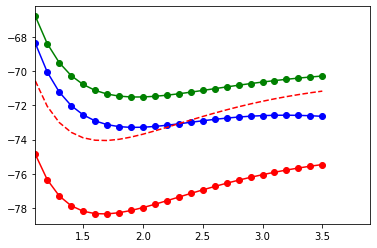

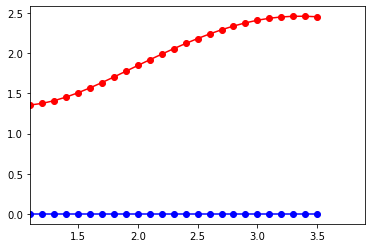

In [43]:
offset = 200.25870407-75/27.211
from matplotlib import pyplot as plt
plt.plot(rs[:], Es[0,:]*27.211+offset*27.211, 'ro-')
plt.plot(rs[:], Es[1,:]*27.211+offset*27.211, 'bo-')
plt.plot(rs[:], Es[2,:]*27.211+offset*27.211, 'go-')
plt.plot(rs[:], Es[0,:]*27.211+offset*27.211+4.3, 'r--')
#plt.ylim(7,11)
plt.xlim(1.1,3.9)
plt.show()

plt.plot(rs[:], np.abs(mu_z[0,:]), 'ro-')
plt.plot(rs[:], np.abs(mu_z[1,:]), 'bo-')
#plt.ylim(7,11)
plt.xlim(1.1,3.9)
plt.show()

- Fit each surface to a spline

- Define a photonic Hamiltonian 

- Define an interaction Hamiltonian

- Build H_tot and diagonalize at each geometry

In [76]:
from numpy import linalg as LA
Eg_spline = InterpolatedUnivariateSpline(rs, Es[0,:], k=3)
Ee_spline = InterpolatedUnivariateSpline(rs, Es[1,:], k=3)

mu_spline = InterpolatedUnivariateSpline(rs, np.abs(mu_z[0,:]), k=3 )

# photon frequency in atomic units
om = 4.3 / 27.211


# conversion from atomic units of field strength 
# to GV / m as is used in the Figure 3 of 
# J. Chem. Phys. 153 234304 (2020)
Efield_SI_to_au = 5.14220674763e-11

# Medium electric field strength from paper JCP paper in SI units
E_field_medium = 3e12

# electric field in atomic units
#E_au = E_field_medium * Efield_SI_to_au
E_au = 0.003

Htot = np.zeros((3,3))

''' Polaritonic Hamiltonian will have the following structure

    | E_g(r)               0                        0            |
    |            E_g(r) + hbar * omega              E_au*mu(r)   |
    | 0                  E_au*mu(r)                   E_e(r)     |
    
'''

pl_1 = np.zeros_like(rs)
pl_2 = np.zeros_like(rs)
pl_3 = np.zeros_like(rs)
for i in range(0,len(rs)):
    # H_00 is just E_g
    Htot[0,0] = Eg_spline(rs[i])
    Htot[1,1] = Eg_spline(rs[i]) + om
    Htot[1,2] = E_au * mu_spline(rs[i])
    Htot[2,1] = E_au * mu_spline(rs[i])
    Htot[2,2] = Ee_spline(rs[i])


    vals, vecs = LA.eig(Htot)
    idx = vals.argsort()[::1]
    vals = vals[idx]
    pl_1[i] = np.real(vals[0])
    pl_2[i] = np.real(vals[1])
    pl_3[i] = np.real(vals[2])





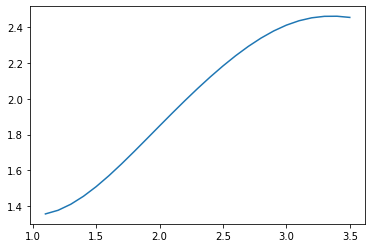

0.0025


In [70]:
plt.plot(rs, mu_spline(rs))
plt.show()
print(0.005 / 2.0)

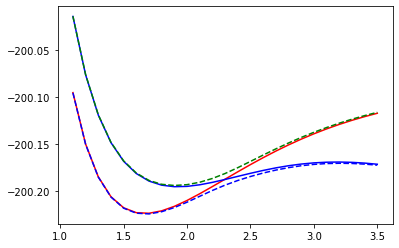

In [77]:
plt.plot(rs, Eg_spline(rs)+om, 'red')
#plt.plot(rs, pl_1, 'ro-')
plt.plot(rs, Ee_spline(rs), 'blue')
plt.plot(rs, pl_2, 'b--')
plt.plot(rs, pl_3, 'g--')